This example illustrates fitting and comparing several Machine Learning algorithms for classifying the binary target in the         
big_organics data set.

The steps include:                              
                                                                      
1. PREPARE AND EXPLORE  
  a) Check data is loaded into CAS                               
<br>                                                                      
2. PERFORM SUPERVISED LEARNING  
  a) Fit a model using a Random Forest  
  b) Fit a model using Gradient Boosting  
  c) Fit a model using a Neural Network  
  d) Fit a model using a Support Vector Machine                       
<br>                                                                      
3. EVALUATE AND IMPLEMENT  
  a) Score the data  
  b) Assess model performance  
  c) Generate ROC and Lift charts                                  

### Import packages

In [1]:
from swat import *
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
from swat.render import render_html
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### CAS Server connection details

In [2]:
cashost='localhost'
casport=5570
casauth='~/.authinfo'
indata_dir="/home/sasdemo/Data/DemoData"
#indata_dir="/home/sasdemo/data"
indata="big_organics"

### Start CAS session

In [3]:
#sess = CAS(cashost, casport, authinfo="~/.authinfo", caslib="casuser")
sess = CAS('localhost', 5570, username="sasdemo", password="SASpw1")
sess

CAS('localhost', 5570, 'sasdemo', protocol='cas', name='py-session-1', session='44dad7bb-f920-5d49-ab6e-969cb2a4a1bc')

### Import action sets

In [4]:
sess.loadactionset(actionset="dataStep")
sess.loadactionset(actionset="dataPreprocess")
sess.loadactionset(actionset="cardinality")
sess.loadactionset(actionset="sampling")
sess.loadactionset(actionset="regression")
sess.loadactionset(actionset="decisionTree")
sess.loadactionset(actionset="neuralNet")
sess.loadactionset(actionset="svm")
sess.loadactionset(actionset="astore")
sess.loadactionset(actionset="percentile")

NOTE: Added action set 'dataStep'.


[actionset]

 'dataStep'

+ Elapsed: 0.000636s, sys: 0.000544s, mem: 0.225mb

NOTE: Added action set 'dataPreprocess'.


[actionset]

 'dataPreprocess'

+ Elapsed: 0.000547s, user: 0.000438s, mem: 0.225mb

NOTE: Added action set 'cardinality'.


[actionset]

 'cardinality'

+ Elapsed: 0.000691s, user: 0.000336s, sys: 0.000269s, mem: 0.226mb

NOTE: Added action set 'sampling'.


[actionset]

 'sampling'

+ Elapsed: 0.00235s, user: 7e-05s, sys: 0.00223s, mem: 0.231mb

NOTE: Added action set 'regression'.


[actionset]

 'regression'

+ Elapsed: 0.00304s, user: 0.00151s, sys: 0.00142s, mem: 0.245mb

NOTE: Added action set 'decisionTree'.


[actionset]

 'decisionTree'

+ Elapsed: 0.00144s, user: 0.000204s, sys: 0.00121s, mem: 0.273mb

NOTE: Added action set 'neuralNet'.


[actionset]

 'neuralNet'

+ Elapsed: 0.00159s, user: 0.000712s, sys: 0.000823s, mem: 0.239mb

NOTE: Added action set 'svm'.


[actionset]

 'svm'

+ Elapsed: 0.00124s, user: 9.6e-05s, sys: 0.00112s, mem: 0.233mb

NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.00103s, sys: 0.001s, mem: 0.226mb

NOTE: Added action set 'percentile'.


[actionset]

 'percentile'

+ Elapsed: 0.000548s, user: 0.000503s, mem: 0.225mb

### Set variables for input data

In [8]:
target          = "targetbuy"
class_inputs    = ["DEmCluster", "PromClass", "DeMClusterGroup", "DemGender", "DemReg", "DemTvReg"]
class_vars      = [target] + class_inputs
interval_inputs = ["DeMAffl", "DemAge", "PromSpend", "PromTime"]
all_inputs      = interval_inputs + class_inputs
all_inputs

['DeMAffl',
 'DemAge',
 'PromSpend',
 'PromTime',
 'DEmCluster',
 'PromClass',
 'DeMClusterGroup',
 'DemGender',
 'DemReg',
 'DemTvReg']

### Load data into CAS if needed

In [9]:
if not sess.table.tableExists(table=indata).exists:
    tbl = sess.upload_file(indata_dir+"/"+indata+".sas7bdat", casout={"name":indata})

NOTE: Cloud Analytic Services made the uploaded file available as table BIG_ORGANICS in caslib CASUSER(sasdemo).
NOTE: The table BIG_ORGANICS has been created in caslib CASUSER(sasdemo) from binary data uploaded to Cloud Analytic Services.


### Explore and Impute missing values

#### View first 5 observations from the data set

In [10]:
sess.fetch(table='big_organics', to=5)

,id,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt,part
0,A0000000140,10.0,76.0,16,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0.0,0.0,1.0
1,A0000000620,4.0,49.0,35,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0.0,0.0,0.0
2,A0000000868,5.0,70.0,27,D,F,Midlands,Wales & West,Silver,0.02,8.0,1.0,1.0,1.0
3,A0000001120,10.0,65.0,51,F,M,Midlands,Midlands,Tin,0.01,7.0,1.0,1.0,0.0
4,A0000002313,11.0,68.0,04,A,F,Midlands,Midlands,Tin,0.01,8.0,0.0,0.0,0.0


#### Explore data and plot missing values

NOTE: Writing cardinality.
NOTE: status = 0.
NOTE: The Cloud Analytic Services server processed the request in 0.094112 seconds.


+ Elapsed: 0.0954s, user: 0.422s, sys: 0.003s, mem: 3.25mb

----------------------------------Data Summary----------------------------------


,_VARNAME_,_FMTWIDTH_,_TYPE_,_RLEVEL_,_ORDER_,_MORE_,_CARDINALITY_,_NOBS_,_SUMFREQS_,_NMISS_,...,_SKEWNESS_,_KURTOSIS_,_MFREQ_,_MFREQFOUNDLEVEL_,_MFREQNUM_,_MFREQCHR_,_MFREQCFMT_,_LASTNUM_,_LASTCHR_,_LASTCFMT_
0,DemAffl,12.0,N,INTERVAL,ASC,Y,30.0,111115.0,105690.0,5425.0,...,0.891633,2.096236,13170.0,Y,8.0,,8,29.0,,29
1,DemAge,12.0,N,INTERVAL,ASC,Y,30.0,111115.0,103575.0,7540.0,...,-0.079826,-0.843962,68930.0,N,NaN,,,47.0,,47
2,DemCluster,2.0,C,ID,ASC,Y,30.0,111115.0,107745.0,3370.0,...,NaN,NaN,44545.0,N,NaN,,,NaN,30,30
3,DemClusterGroup,1.0,C,CLASS,ASC,N,7.0,111115.0,107745.0,3370.0,...,NaN,NaN,22830.0,Y,NaN,C,C,NaN,U,U
4,DemGender,1.0,C,CLASS,ASC,N,3.0,111115.0,98555.0,12560.0,...,NaN,NaN,60745.0,Y,NaN,F,F,NaN,U,U
5,DemReg,10.0,C,CLASS,ASC,N,5.0,111115.0,108790.0,2325.0,...,NaN,NaN,43170.0,Y,NaN,South East,South East,NaN,South West,South West
6,DemTVReg,12.0,C,CLASS,ASC,N,13.0,111115.0,108790.0,2325.0,...,NaN,NaN,30945.0,Y,NaN,London,London,NaN,Yorkshire,Yorkshire
7,PromTime,12.0,N,INTERVAL,ASC,Y,30.0,111115.0,109710.0,1405.0,...,2.282665,8.075931,21570.0,Y,5.0,,5,29.0,,29


CASTable('data_card', where='_NMISS_>0')

Text(0, 0.5, 'Percent Missing')

Text(0.5, 0, 'Variable Names')

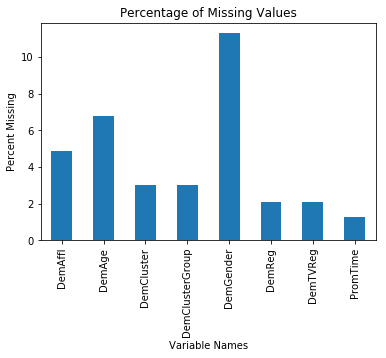

In [11]:
sess.cardinality.summarize(
  table={"name":indata}, 
  cardinality={"name":"data_card", "replace":True}
)

tbl_data_card=sess.CASTable('data_card')
tbl_data_card.where='_NMISS_>0'
print("Data Summary".center(80, '-')) # print title
tbl_data_card.fetch() # print obs

tbl_data_card

tbl_data_card.vars=['_VARNAME_', '_NMISS_', '_NOBS_']
allRows=20000  # Assuming max rows in data_card table is <= 20,000
df_data_card=tbl_data_card.fetch(to=allRows)['Fetch']
df_data_card['PERCENT_MISSING']=(df_data_card['_NMISS_']/df_data_card['_NOBS_'])*100

tbl_forplot=pd.Series(list(df_data_card['PERCENT_MISSING']), index=list(df_data_card['_VARNAME_']))
ax=tbl_forplot.plot(
  kind='bar', 
  title='Percentage of Missing Values'
)
ax.set_ylabel('Percent Missing')
ax.set_xlabel('Variable Names')

#### Impute missing values

In [12]:
sess.dataPreprocess.transform(
  table={"name":indata},
  casOut={"name":"big_organics_prepped", "replace":True},
  copyAllVars=True,
  outVarsNameGlobalPrefix="IM",
  requestPackages=[
    {"impute":{"method":"MEAN"}, "inputs":{"DeMAffl", "DemAge", "PromSpend", "PromTime"}},
    {"impute":{"method":"MODE"},"inputs":{"DEmCluster", "PromClass", "DeMClusterGroup", "DemGender", "DemReg", "DemTvReg"}}
  ]
)

[TransInfo]

 Transformation Requests for BIG_ORGANICS
 
   ActualName  NTransVars ImputeMethod
 0       _TR1           4         Mean
 1       _TR2           6         Mode

[VarTransInfo]

 Variable Transformation Information for BIG_ORGANICS
 
           Variable Transformation           ResultVar       N  NMiss  \
 0          DemAffl             IM          IM_DemAffl  105690   5425   
 1           DemAge             IM           IM_DemAge  103575   7540   
 2        PromSpend             IM        IM_PromSpend  111115      0   
 3         PromTime             IM         IM_PromTime  109710   1405   
 4       DemCluster             IM       IM_DemCluster  107745   3370   
 5  DemClusterGroup             IM  IM_DemClusterGroup  107745   3370   
 6        DemGender             IM        IM_DemGender   98555  12560   
 7           DemReg             IM           IM_DemReg  108790   2325   
 8         DemTVReg             IM         IM_DemTVReg  108790   2325   
 9        PromClass             IM        IM_PromClass  111115      0   
 
    ImputedValueContinuous ImputedValueNominal  
 0                8.711893                      
 1               53.797152                      
 2             4420.590041                      
 3                6.564670                      
 4                     NaN                  52  
 5                     NaN                   C  
 6                     NaN                   F  
 7                     NaN          South East  
 8                     NaN              London  
 9                     NaN              Silver  

[NomVarInfo]

 Nominal Variable Information for BIG_ORGANICS
 
           Variable         N    NMiss  NLevels
 0       DemCluster  107745.0   3370.0     55.0
 1  DemClusterGroup  107745.0   3370.0      7.0
 2        DemGender   98555.0  12560.0      3.0
 3           DemReg  108790.0   2325.0      5.0
 4         DemTVReg  108790.0   2325.0     13.0
 5        PromClass  111115.0      0.0      4.0

[OutputCasTables]

              casLib                  Name    Rows  Columns  \
 0  CASUSER(sasdemo)  big_organics_prepped  111115       24   
 
                                             casTable  
 0  CASTable('big_organics_prepped', caslib='CASUS...  

+ Elapsed: 0.127s, user: 0.496s, sys: 0.0201s, mem: 32.7mb

### Partition data into Training and Validation

In [13]:
sess.sampling.stratified(
  table={"name":"big_organics_prepped", "groupBy":"targetbuy"},
  output={"casOut":{"name":"big_organics_part", "replace":True}, "copyVars":"ALL"},
  samppct=70,
  partind=True
)

NOTE: Stratified sampling is in effect.
NOTE: Using SEED=1411666427 for sampling.


[STRAFreq]

 Frequencies
 
    ByGrpID     TargetBuy   NObs  NSamp
 0        0             0  83590  58513
 1        1             1  27525  19268

[OutputCasTables]

              casLib               Name Label    Rows  Columns  \
 0  CASUSER(sasdemo)  big_organics_part        111115       25   
 
                                             casTable  
 0  CASTable('big_organics_part', caslib='CASUSER(...  

+ Elapsed: 0.0947s, user: 0.34s, sys: 0.026s, mem: 32.5mb

### Random Forest

In [14]:
rf = sess.decisionTree.forestTrain(
  table={
    "name":"big_organics_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs=all_inputs,
  nominals=class_vars,
  target="targetbuy",
  nTree=50,
  nBins=20,
  leafSize=5,
  maxLevel=21,
  crit="GAINRATIO",
  varImp=True,
  missing="USEINSEARCH",
  vote="PROB",
  OOB=True,
  casOut={"name":"forest_model", "replace":True}
)

# Output model statistics
render_html(rf)

# Score 
sess.decisionTree.forestScore(
  table={"name":"big_organics_part"},
  modelTable={"name":"forest_model"},
  casOut={"name":"_scored_rf", "replace":True},
  copyVars={"targetbuy", "_partind_"},
  vote="PROB"
)

# Create p_targetbuy0 and p_targetbuy1 as _rf_predp_ is the probability of event in _rf_predname_
sess.dataStep.runCode(
  code="""data _scored_rf; set _scored_rf; if _rf_predname_=1 then do; p_targetbuy1=_rf_predp_; 
    p_targetbuy0=1-p_targetbuy1; end; if _rf_predname_=0 then do; p_targetbuy0=_rf_predp_; p_targetbuy1=1-p_targetbuy0; end; run;"""
)

Forest for BIG_ORGANICS_PART 
 Descr 
 Value 
 
 
 Number of Trees 50 
 Number of Selected Variables (M) 4 
 Random Number Seed 0 
 Bootstrap Percentage (%) 63.212055882 
 Number of Bins 20 
 Number of Variables 10 
 Confidence Level for Pruning 0.25 
 Max Number of Tree Nodes 2793 
 Min Number of Tree Nodes 1735 
 Max Number of Branches 2 
 Min Number of Branches 2 
 Max Number of Levels 21 
 Min Number of Levels 21 
 Max Number of Leaves 1397 
 Min Number of Leaves 868 
 Maximum Size of Leaves 7884 
 Minimum Size of Leaves 5 
 Out-of-Bag MCR (%) 12.203494427 
 Average number of Leaves 1110.12 
 
 
 
 
 OOB Error With Forest Analytics for BIG_ORGANICS_PART 
 TreeID 
 Trees 
 NLeaves 
 MCR 
 LogLoss 
 ASE 
 RASE 
 MAXAE 
 
 
 0 1 1257 0.1573093476 0.6419784779 0.1160576445 0.3406723418 1 
 1 2 2518 0.1515451501 0.5436617763 0.1119679331 0.3346160981 1 
 2 3 3626 0.1453732498 0.463258327 0.1081142608 0.3288073309 1 
 3 4 4647 0.1415857496 0.4095504294 0.1057079577 0.3251276022 1 
 4 5 5792 0.1393649459 0.3740166903 0.1034702378 0.3216678998 1 
 5 6 6871 0.1360882903 0.3514184076 0.1018330995 0.3191129885 1 
 6 7 8043 0.1326985439 0.3409880908 0.1001346145 0.3164405386 1 
 7 8 9148 0.1320861678 0.3308741781 0.0993767481 0.3152407779 1 
 8 9 10274 0.1309775055 0.327510718 0.0989083271 0.314496943 1 
 9 10 11195 0.130821768 0.3253095958 0.098841178 0.3143901685 1 
 10 11 12125 0.1300216038 0.3240453461 0.0987701754 0.3142772269 1 
 11 12 13088 0.1301496683 0.3235909087 0.0988164143 0.3143507822 1 
 12 13 14269 0.1291272372 0.3215004862 0.0981713504 0.3133230768 1 
 13 14 15573 0.1281563384 0.3190938617 0.0972668426 0.3118763258 1 
 14 15 16670 0.1273832941 0.3180600429 0.0968755075 0.3112483052 1 
 15 16 17692 0.1267918901 0.3177000295 0.0967717215 0.3110815352 0.9952598996 
 16 17 18846 0.1270490223 0.3170998009 0.0965680138 0.3107539441 0.9952598996 
 17 18 20033 0.1265476145 0.3162627306 0.0961620271 0.3101000276 0.9943799891 
 18 19 21209 0.1253648063 0.3154679194 0.095780996 0.3094850497 0.9943799891 
 19 20 22347 0.1250176778 0.3150834697 0.0956409168 0.3092586568 0.9948122976 
 20 21 23571 0.1250176778 0.3145823724 0.0954443133 0.3089406307 0.9924375872 
 21 22 24968 0.124451987 0.3133017082 0.094947086 0.3081348504 0.9929417481 
 22 23 26080 0.1240405755 0.3133751484 0.0949451475 0.3081317049 0.9926358769 
 23 24 27048 0.1242977077 0.3140406484 0.0951415411 0.3084502246 0.9926358769 
 24 25 28118 0.1240662887 0.3141018399 0.0951124177 0.3084030119 0.991040663 
 25 26 29510 0.1234106016 0.3129469133 0.0946634259 0.3076742204 0.991538404 
 26 27 30428 0.1234491714 0.3135737851 0.0948750955 0.3080180117 0.9911209384 
 27 28 31332 0.1239634358 0.3143144382 0.0951358566 0.3084410099 0.9912707738 
 28 29 32200 0.1240920019 0.3150074197 0.0953420007 0.3087750002 0.9916864512 
 29 30 33179 0.1238091565 0.3152686265 0.095379909 0.308836379 0.9911339836 
 30 31 34197 0.123989149 0.3153417761 0.0954010069 0.3088705342 0.9915194626 
 31 32 35266 0.1242719944 0.31544242 0.0954427393 0.3089380832 0.9915194626 
 32 33 36281 0.1246448361 0.3155095109 0.0954722615 0.3089858597 0.9918728183 
 33 34 37283 0.1244905568 0.3157386126 0.0955288295 0.3090773843 0.9918728183 
 34 35 38532 0.1239505792 0.3152414867 0.0953337446 0.3087616308 0.9918728183 
 35 36 39728 0.1235777375 0.3149100528 0.0952141536 0.3085679076 0.9918728183 
 36 37 40857 0.1238348697 0.3147304424 0.0951449406 0.3084557352 0.9912714435 
 37 38 41862 0.1239634358 0.3149531437 0.0952127119 0.3085655715 0.9916071572 
 38 39 42892 0.1237448734 0.3150534327 0.0952191873 0.308576064 0.9916071572 
 39 40 43972 0.1240534321 0.3150040259 0.0951944206 0.3085359308 0.9907216521 
 40 41 45173 0.1239634358 0.3146713343 0.0950709486 0.3083357724 0.9910530217 
 41 42 46415 0.1235905941 0.3141759419 0.0948793677 0.3080249465 0.9902269442 
 42 43 47566 0.1232434656 0.3140821947 0.0948280452 0.3079416263 0.9905527127 
 43 44 48913 0.1224977822 0.3134835232 0.0945949988 0.3075629997 0.990552712

[OutputCasTables]

              casLib        Name    Rows  Columns  \
 0  CASUSER(sasdemo)  _scored_rf  111115        7   
 
                                             casTable  
 0  CASTable('_scored_rf', caslib='CASUSER(sasdemo)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                            111115
 1  Number of Observations Used                            111115
 2  Misclassification Error (%)                      11.416100436

+ Elapsed: 5.47s, user: 26.2s, sys: 0.4s, mem: 641mb

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:35    0:127
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 6 times)
      0:35    0:127  (occurred 6 times)


[InputCasTables]

              casLib        Name    Rows  Columns  \
 0  CASUSER(sasdemo)  _scored_rf  111115        7   
 
                                             casTable  
 0  CASTable('_scored_rf', caslib='CASUSER(sasdemo)')  

[OutputCasTables]

              casLib        Name    Rows  Columns  Append Promoted  \
 0  CASUSER(sasdemo)  _scored_rf  111115        9     NaN        N   
 
                                             casTable  
 0  CASTable('_scored_rf', caslib='CASUSER(sasdemo)')  

+ Elapsed: 0.0435s, user: 0.0795s, sys: 0.0112s, mem: 9.91mb

### Gradient Boosting

In [ ]:
gb = sess.decisionTree.gbtreeTrain(
  table={
    "name":"big_organics_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs=all_inputs,
  nominals=class_vars,
  target="targetbuy",
  nTree=10,
  nBins=20,
  maxLevel=6,
  varImp=True,
  missing="USEINSEARCH",
  casOut={"name":"gb_model", "replace":True}
)

# Output model statistics
render_html(gb)

# Score 
sess.decisionTree.gbtreeScore(
  table={"name":"big_organics_part"},
  modelTable={"name":"gb_model"},
  casOut={"name":"_scored_gb", "replace":True},
  copyVars={"targetbuy", "_partind_"}
)

# Create p_targetbuy0 and p_targetbuy1 as _gbt_predp_ is the probability of event in _gbt_predname_
sess.dataStep.runCode(
  code="""data _scored_gb; set _scored_gb; if _gbt_predname_=1 then do; p_targetbuy1=_gbt_predp_; 
    p_targetbuy0=1-p_targetbuy1; end; if _gbt_predname_=0 then do; p_targetbuy0=_gbt_predp_; p_targetbuy1=1-p_targetbuy0; end; run;"""
)

### Neural Network

In [17]:
nn = sess.neuralNet.annTrain(
  table={
    "name":"big_organics_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  validTable={
    "name":"big_organics_part",
    "where":"strip(put(_partind_, best.))='0'"
  },
  inputs=all_inputs,
  nominals=class_vars,
  target="targetbuy",
  hiddens={1},
  acts={"TANH"},
  combs={"LINEAR"},
  targetAct="SOFTMAX",
  errorFunc="ENTROPY",
  std="MIDRANGE",
  randDist="UNIFORM",
  scaleInit=1,
  nloOpts={
    "optmlOpt":{"maxIters":250, "fConv":1e-10}, 
    "lbfgsOpt":{"numCorrections":6},
    "printOpt":{"printLevel":"printDetail"},
    "validate":{"frequency":1}
  },
  casOut={"name":"nnet_model", "replace":True}
)

# Output model statistics
render_html(nn)

# Score 
sess.neuralNet.annScore(
  table={"name":"big_organics_part"},
  modelTable={"name":"nnet_model"},
  casOut={"name":"_scored_nn", "replace":True},
  copyVars={"targetbuy", "_partind_"}
)

# Create p_targetbuy0 and p_targetbuy1 as _nn_predp_ is the probability of event in _nn_predname_
sess.dataStep.runCode(
  code="""data _scored_nn; set _scored_nn; if _nn_predname_=1 then do; p_targetbuy1=_nn_predp_; 
    p_targetbuy0=1-p_targetbuy1; end; if _nn_predname_=0 then do; p_targetbuy0=_nn_predp_; p_targetbuy1=1-p_targetbuy0; end; run;"""
)

Iteration History 
 Progress 
 Objective 
 Loss 
 Validation Error 
 Fit Error 
 Step Size 
 L1 Norm 
 L2 Norm 
 MAX Norm 
 Gradient Norm 
 
 
 1 2.7716156745 2.7716156745 0.4754706218 0.4762948276 0 1.299514579 0.7864492917 0.7840609521 1.7892307128 
 2 2.322041971 2.322041971 0.2628147665 0.2639222234 0.5588994157 4.4551556798 1.0819971696 0.7847198252 0.239536907 
 3 2.3033322844 2.3033322844 0.2628147665 0.2639222234 1 4.3030662543 1.0198451588 0.7127440511 0.0987775792 
 4 2.2977329214 2.2977329214 0.2628147665 0.2639222234 1 4.1599161438 0.9816614519 0.6745883369 0.0686875906 
 5 2.2753490785 2.2753490785 0.2628147665 0.2639222234 5 3.8849915558 0.9857224407 0.6424281608 0.3843078191 
 6 2.2726203146 2.2726203146 0.2628147665 0.2639222234 0.0429140798 3.9187274776 1.0025192706 0.6437195014 0.4226240365 
 7 2.2472573999 2.2472573999 0.2430119795 0.2421997287 1 4.3934991363 1.2089952784 0.7071510982 0.635518754 
 8 2.1821122574 2.1821122574 0.2425230218 0.2415388361 1 4.7596334452 1.3307348717 0.7866488193 0.5238938406 
 9 1.9875713629 1.9875713629 0.2297286285 0.2269992 1 8.2531553202 2.4697650241 1.4310029054 0.3831410789 
 10 1.9545193796 1.9545193796 0.221375601 0.2189989217 1 8.0271112686 2.5087421986 1.5538077045 0.4774885285 
 11 1.925311585 1.925311585 0.2077662782 0.2061115169 1 8.3351369061 2.6102276228 1.580483932 0.1721784971 
 12 1.8984874536 1.8984874536 0.204058349 0.2001287001 1 8.4385552996 2.7335338362 1.6498671861 0.130464465 
 13 1.8736481844 1.8736481844 0.206462391 0.204754948 1 10.520683687 3.3896010497 1.9669376167 0.4901564438 
 14 1.8401537316 1.8401537316 0.1966832369 0.195363317 1 9.1789807347 3.1565721592 1.8685905449 0.1075856122 
 15 1.8331517681 1.8331517681 0.1957053215 0.1955198442 1 9.2984372921 3.2037054068 1.8940354253 0.0941946479 
 16 1.8207768143 1.8207768143 0.1978241382 0.196702494 1 9.8106773963 3.3527355616 2.0248335541 0.1834732021 
 17 1.8097984349 1.8097984349 0.1969277158 0.1963024801 1 10.231143607 3.5028759024 2.214739233 0.1789714598 
 18 1.7892546643 1.7892546643 0.1956238285 0.1957285471 1 11.097009976 3.7991176609 2.6038572769 0.1079092966 
 19 1.7868063012 1.7868063012 0.195664575 0.1949285193 0.5067575609 11.153341673 3.8162667559 2.6115541364 0.033860624 
 20 1.7860281493 1.7860281493 0.1966424904 0.1954676684 1 11.230187077 3.8286619392 2.6156005356 0.0251008773 
 21 1.7856033137 1.7856033137 0.1963980116 0.1949633031 1 11.296253448 3.8378457474 2.6089735439 0.0192088552 
 22 1.7851679355 1.7851679355 0.1966424904 0.1953807089 1 11.39237695 3.8403253305 2.5861403898 0.0413733401 
 23 1.7844915579 1.7844915579 0.1965609975 0.1948937354 1 11.56724934 3.856723856 2.5779717259 0.023230967 
 24 1.7837706901 1.7837706901 0.1956238285 0.1949459112 1 11.823237226 3.8667878183 2.5494427157 0.0224791897 
 25 1.7831245459 1.7831245459 0.1962757721 0.195363317 1 11.98196271 3.8611348649 2.5172770375 0.0226682265 
 26 1.7821448711 1.7821448711 0.1983945889 0.1954154927 1 12.861469886 3.7931398608 2.5812181509 0.1014942047 
 27 1.7810508546 1.7810508546 0.1969277158 0.195172006 1 12.758085555 3.7990614565 2.5661185345 0.0572578185 
 28 1.7805142582 1.7805142582 0.1971314481 0.1958676824 1 12.511526185 3.7801331789 2.528820756 0.0178780239 
 29 1.7802944378 1.7802944378 0.1974166735 0.1958328985 1 12.513851807 3.7607729004 2.528816474 0.0204348991 
 30 1.7798017409 1.7798017409 0.1963165186 0.195172006 1 12.464426487 3.7138977372 2.5405483299 0.0575807913 
 31 1.7793061633 1.7793061633 0.1963165186 0.1952589655 1 12.559982817 3.6837992211 2.5656934621 0.0236972615 
 32 1.7789061698 1.7789061698 0.1960720398 0.1948415597 1 12.547860074 3.6809973 2.5817112728 0.0227159314 
 33 1.7785180796 1.7785180796 0.194808899 0.1938154371 1 12.527119751 3.680595718 2.6116173333 0.0304131315 
 34 1.7783123725 1.7783123725 0.1945236737 0.1935893422 0.5225091173 12.715624209 3.6879906179 2.661248858 0.0201598092 
 35 1.7779944897 1.7779944897 0.1958683074 0.194406762 1 12.805438363 3.6981518395 2.

[OutputCasTables]

              casLib        Name    Rows  Columns  \
 0  CASUSER(sasdemo)  _scored_nn  111115        4   
 
                                             casTable  
 0  CASTable('_scored_nn', caslib='CASUSER(sasdemo)')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                            111115
 1  Number of Observations Used                             82040
 2  Misclassification Error (%)                      19.575816675

+ Elapsed: 0.0782s, user: 0.351s, sys: 0.00492s, mem: 17.7mb

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:35    0:127
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 6 times)
      0:35    0:127  (occurred 6 times)


[InputCasTables]

              casLib        Name    Rows  Columns  \
 0  CASUSER(sasdemo)  _scored_nn  111115        4   
 
                                             casTable  
 0  CASTable('_scored_nn', caslib='CASUSER(sasdemo)')  

[OutputCasTables]

              casLib        Name    Rows  Columns  Append Promoted  \
 0  CASUSER(sasdemo)  _scored_nn  111115        6     NaN        N   
 
                                             casTable  
 0  CASTable('_scored_nn', caslib='CASUSER(sasdemo)')  

+ Elapsed: 0.0257s, user: 0.0717s, sys: 0.0223s, mem: 8.57mb

### Assess Models

In [18]:
def assess_model(prefix):
    return sess.percentile.assess(
      table={
        "name":"_scored_" + prefix, 
        "where": "strip(put(_partind_, best.))='0'"
      },
      inputs=[{"name":"p_targetbuy1"}],      
      response="targetbuy",
      event="1",
      pVar={"p_targetbuy0"},
      pEvent={"0"}      
    )

rfAssess=assess_model(prefix="rf")    
rf_fitstat =rfAssess.FitStat
rf_rocinfo =rfAssess.ROCInfo
rf_liftinfo=rfAssess.LIFTInfo

gbAssess=assess_model(prefix="gb")    
gb_fitstat =gbAssess.FitStat
gb_rocinfo =gbAssess.ROCInfo
gb_liftinfo=gbAssess.LIFTInfo

nnAssess=assess_model(prefix="nn")    
nn_fitstat =nnAssess.FitStat
nn_rocinfo =nnAssess.ROCInfo
nn_liftinfo=nnAssess.LIFTInfo

nn_rocinfo

,Variable,Event,CutOff,TP,FP,FN,TN,Sensitivity,Specificity,KS,...,F_HALF,FPR,ACC,FDR,F1,C,Gini,Gamma,Tau,MISCEVENT
0,p_targetbuy1,1,0.00,6450.0,18092.0,0.0,0.0,1.000000,0.000000,0.0,...,0.308264,1.000000,0.262815,0.737185,0.416236,0.803359,0.606717,0.614393,0.235104,0.737185
1,p_targetbuy1,1,0.01,6450.0,18092.0,0.0,0.0,1.000000,0.000000,0.0,...,0.308264,1.000000,0.262815,0.737185,0.416236,0.803359,0.606717,0.614393,0.235104,0.737185
2,p_targetbuy1,1,0.02,6450.0,18092.0,0.0,0.0,1.000000,0.000000,0.0,...,0.308264,1.000000,0.262815,0.737185,0.416236,0.803359,0.606717,0.614393,0.235104,0.737185
3,p_targetbuy1,1,0.03,6450.0,17985.0,0.0,107.0,1.000000,0.005914,0.0,...,0.309531,0.994086,0.267175,0.736034,0.417678,0.803359,0.606717,0.614393,0.235104,0.732825
4,p_targetbuy1,1,0.04,6439.0,17391.0,11.0,701.0,0.998295,0.038746,0.0,...,0.316351,0.961254,0.290930,0.729794,0.425297,0.803359,0.606717,0.614393,0.235104,0.709070
5,p_targetbuy1,1,0.05,6410.0,16522.0,40.0,1570.0,0.993798,0.086779,0.0,...,0.326448,0.913221,0.325157,0.720478,0.436322,0.803359,0.606717,0.614393,0.235104,0.674843
6,p_targetbuy1,1,0.06,6342.0,15610.0,108.0,2482.0,0.983256,0.137188,0.0,...,0.336417,0.862812,0.359547,0.711097,0.446588,0.803359,0.606717,0.614393,0.235104,0.640453
7,p_targetbuy1,1,0.07,6250.0,14614.0,200.0,3478.0,0.968992,0.192240,0.0,...,0.347585,0.807760,0.396382,0.700441,0.457641,0.803359,0.606717,0.614393,0.235104,0.603618
8,p_targetbuy1,1,0.08,6164.0,13629.0,286.0,4463.0,0.955659,0.246684,0.0,...,0.359954,0.753316,0.433013,0.688577,0.469763,0.803359,0.606717,0.614393,0.235104,0.566987
9,p_targetbuy1,1,0.09,6080.0,12699.0,370.0,5393.0,0.942636,0.298088,0.0,...,0.372704,0.701912,0.467484,0.676234,0.481985,0.803359,0.606717,0.614393,0.235104,0.532516


### Create ROC and Lift plots (using Validation data)

#### Prepare assessment results for plotting

In [19]:
# Add new variable to indicate type of model
rf_liftinfo["model"]="Forest"
rf_rocinfo["model"]="Forest"
gb_liftinfo["model"]="GradientBoosting"
gb_rocinfo["model"]="GradientBoosting"
nn_liftinfo["model"]="NeuralNetwork"
nn_rocinfo["model"]="NeuralNetwork"

# Append data
all_liftinfo=rf_liftinfo.append(gb_liftinfo, ignore_index=True) \
    .append(nn_liftinfo, ignore_index=True)  
all_rocinfo=rf_rocinfo.append(gb_rocinfo, ignore_index=True) \
    .append(nn_rocinfo, ignore_index=True) 

#### Print AUC (Area Under the ROC Curve)

In [20]:
print("AUC (using validation data)".center(80, '-'))
all_rocinfo[["model", "C"]].drop_duplicates(keep="first").sort_values(by="C", ascending=False)

--------------------------AUC (using validation data)---------------------------


,model,C
0,Forest,0.917869
100,GradientBoosting,0.830019
200,NeuralNetwork,0.803359


#### Draw ROC and Lift plots

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve (using validation data)')

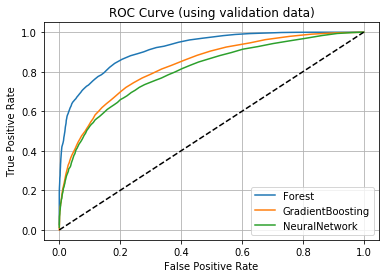

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Depth')

Text(0, 0.5, 'Lift')

Text(0.5, 1.0, 'Lift Chart (using validation data)')

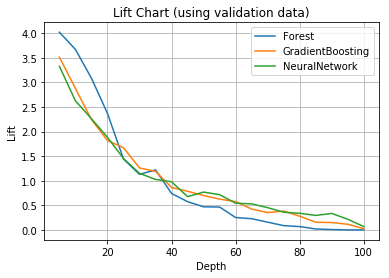

In [21]:
#/* Draw ROC charts */ 
plt.figure()
for key, grp in all_rocinfo.groupby(["model"]):
    plt.plot(grp["FPR"], grp["Sensitivity"], label=key)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend(loc="best")
plt.title("ROC Curve (using validation data)")
plt.show()

#/* Draw lift charts */
plt.figure()
for key, grp in all_liftinfo.groupby(["model"]):
    plt.plot(grp["Depth"], grp["Lift"], label=key)
plt.xlabel("Depth")
plt.ylabel("Lift")
plt.grid(True)
plt.legend(loc="best")
plt.title("Lift Chart (using validation data)")
plt.show()

### End CAS session

In [22]:
sess.close()